# 1.라이브러리 불러오기

In [1]:
#  # colab 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 사용을 위해 설치
# 아래 코드 실행하면 한글 폰트 설치할 필요 없음!
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.8 MB/s eta 0:00:00


# 2.데이터 불러오기 및 train, test set 나누기

In [3]:
data = pd.read_csv('/content/drive/MyDrive/비어플/dataset/diabetes.csv') # 데이터 불러오기

In [4]:
X = data.iloc[:,:-1] # 예측변수
Y = data.iloc[:,-1] # 타겟변수

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1, stratify = Y, test_size = 0.3)

# 3.데이터 전처리하기
**(데이터 전처리는 훈련세트를 기준으로 해야한다 전체 데이터 셋을 기준으로 하면 모델 성능이 과평가된다.)**
1. 결측치 처리하기: 로지스틱회귀는 결측치를 허용 x
2. 범주형 변수 변환: 로지스틱회귀는 수치형 입력만 허용
3. 이상치 처리
4. 다중공선성 확인: 독립 변수간에 높은 상관관계는 모델의 성능을 저하시킨다.
5. 특성 스케일링: 로지스틱회귀는 손실함수에 경사하강법을 이용하는 알고리즘이기 때문에 계수의 최적화를 위해 특성 스케일링이 거의 필수적이다.
6. 특성 추출(LDA): 상황에 따라..


## 3.1 결측치 처리하기

In [6]:
X_train.isna().sum() # 결측치가 존재하지 않는다.

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


## 3.2 범주형 변수 변환


In [7]:
X_train.info(), X_train.head() # 범주형 변수가 존재하지 않는다

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 216 to 645
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    int64  
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 37.8 KB


(None,
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 216            5      109             62             41      129  35.8   
 556            1       97             70             40        0  38.1   
 540            8      100             74             40      215  39.4   
 697            0       99              0              0        0  25.0   
 340            1      130             70             13      105  25.9   
 
      DiabetesPedigreeFunction  Age  
 216                     0.514   25  
 556                     0.218   30  
 540                     0.661   43  
 697                     0.253   22  
 340                     0.472   22  )

## 3.3 이상치 처리

In [8]:
X_train.describe() # 간단하게 min max값을 확인해보자

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.836127,121.426443,68.893855,20.590317,80.363128,32.026257,0.481223,33.266294
std,3.380028,32.163393,18.457543,15.964856,108.262690,7.515134,0.337300,11.779609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.253000,24.000000
50%,3.000000,118.000000,70.000000,23.000000,44.000000,32.000000,0.378000,30.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.400000,0.647000,41.000000
max,17.000000,198.000000,110.000000,99.000000,600.000000,59.400000,2.420000,81.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

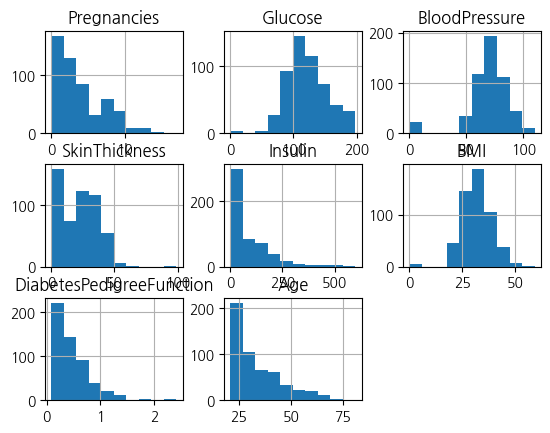

In [9]:
X_train.hist()

조금 이상한 값들이 보인다 상식적으로 0일 수 없는 것들이 0인 경우가 많다. 조금만 더 살펴보자

<Axes: >

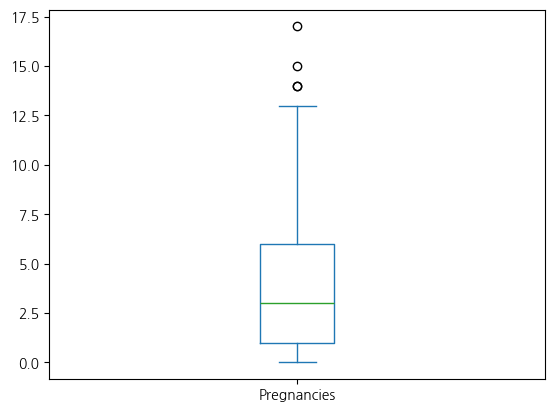

In [10]:
X_train['Pregnancies'].plot.box() # 섣불리 이상치 처리하는 것은 위험해보인다

<Axes: >

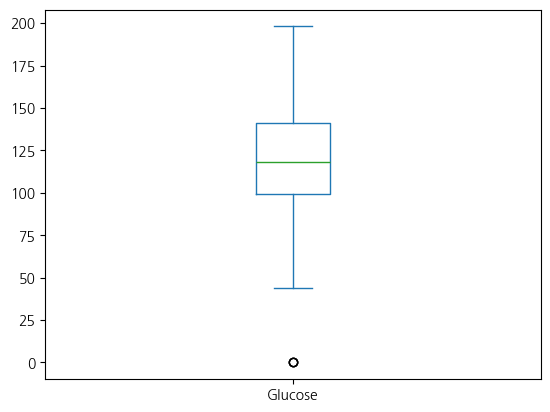

In [11]:
X_train['Glucose'].plot.box() # glucose 수치가 0인 것은 이상치(입력 오류)가 확실하므로 결측치 처리를 한 이후 다시 보간해야한다.

<Axes: >

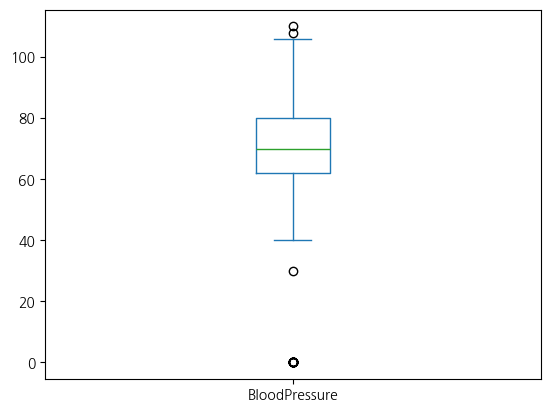

In [12]:
X_train['BloodPressure'].plot.box() # 혈압이 0 인것은 이상치(입력 오류)가 확실하므로 결측치 처리를 한 이후 보간해야한다.

<Axes: >

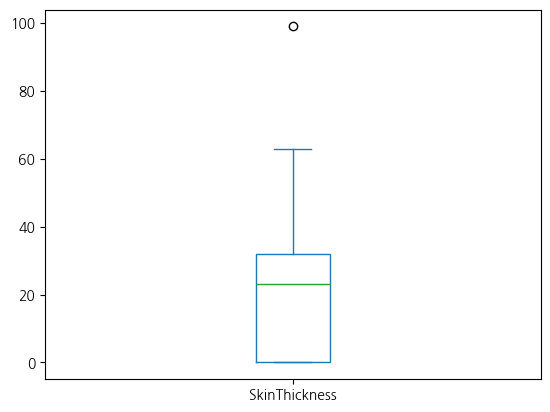

In [13]:
X_train['SkinThickness'].plot.box()

<Axes: >

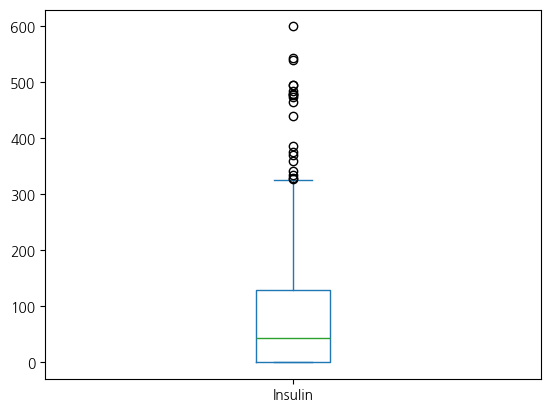

In [14]:
X_train['Insulin'].plot.box()

<Axes: >

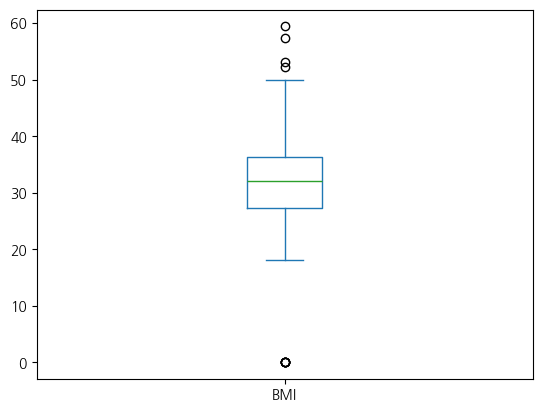

In [15]:
X_train['BMI'].plot.box()

마찬가지로 pregnancies변수를 제외하고 나머지 특성 값에 0이 존재하는 경우는 결측치로 변환하는것이 합리적이다

## 3.3+@ 결측치 보간

In [16]:
X_train[X_train.iloc[:,1:] == 0] = np.NaN # 0인 값들 결측치로 변환

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

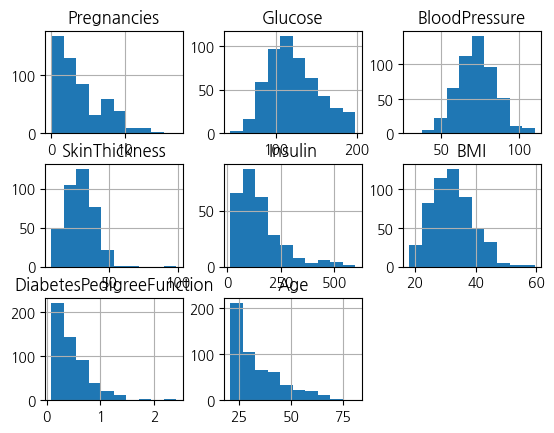

In [17]:
X_train.hist() # 각 데이터들의 분포 다시 확인하기

right skewed 된 분포가 여럿 보이므로 결측치를 중앙값으로 보간하였다

In [18]:
import pandas as pd
from sklearn.impute import SimpleImputer
# 중앙값으로 보간
imputer = SimpleImputer(strategy='median')
X_train_array = imputer.fit_transform(X_train)
X_test_array = imputer.transform(X_test)

# 다시 DataFrame으로 변환
X_train = pd.DataFrame(X_train_array, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_array, columns=X_test.columns, index=X_test.index)


## 3.4 다중공선성 확인

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 데이터프레임에 상수 추가 (VIF 계산 필수)
df_with_const = add_constant(X_train)

# 각 변수의 VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(df_with_const.values, i)
    for i in range(df_with_const.shape[1])
]

vif_data
# 상수항을 제외한 나머지 변수의 VIF값이 낮음

,Variable,VIF
0,const,55.095826
1,Pregnancies,1.418401
2,Glucose,1.365885
3,BloodPressure,1.228972
4,SkinThickness,1.446399
5,Insulin,1.229578
6,BMI,1.550636
7,DiabetesPedigreeFunction,1.053777
8,Age,1.634279


In [20]:
X_train.corr().abs()
# 0.7이상인 것은 없음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.143854,0.184173,0.084902,0.034973,0.032473,0.043554,0.539544
Glucose,0.143854,1.000000,0.217162,0.181196,0.414354,0.220115,0.136585,0.289449
BloodPressure,0.184173,0.217162,1.000000,0.179499,0.047763,0.270707,0.003964,0.329489
SkinThickness,0.084902,0.181196,0.179499,1.000000,0.168301,0.536690,0.118757,0.151764
Insulin,0.034973,0.414354,0.047763,0.168301,1.000000,0.168787,0.077580,0.107684
BMI,0.032473,0.220115,0.270707,0.536690,0.168787,1.000000,0.179813,0.048636
DiabetesPedigreeFunction,0.043554,0.136585,0.003964,0.118757,0.077580,0.179813,1.000000,0.022629
Age,0.539544,0.289449,0.329489,0.151764,0.107684,0.048636,0.022629,1.000000


독립변수들간의 상관관계가 크지 않으므로 변수삭제없이 그대로 진행

## 3.5 특성스케일링

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

## 3.6 LDA


In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_train_lda = lda.fit_transform(X_train_std,Y_train)
X_test_lda = lda.transform(X_test_std)

# 4.하이퍼 파라미터 튜닝

데이터가 크지 않으므로 그리드서치를 이용한다

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 파이프라인 사용 (전처리 + 모델)
pipeline = Pipeline(steps=[('lr', LogisticRegression(max_iter=2000, random_state=1))
])

# 하이퍼파라미터 그리드 (호환 가능한 조합으로 재정의)
param_grid = [
    {
        'lr__penalty': ['l1', 'l2'],
        'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'lr__solver': ['liblinear', 'saga']  # L1/L2 규제 지원 solver
    },
    {
        'lr__penalty': ['l2'],
        'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'lr__solver': ['lbfgs', 'newton-cg', 'sag']  # L2만 지원하는 solver
    },
    {
        'lr__penalty': ['elasticnet'],
        'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'lr__solver': ['saga'],  # elasticnet은 saga만 지원
        'lr__l1_ratio': [0.1, 0.5, 0.9]  # 필수: elasticnet 사용 시 l1_ratio 지정
    },
    {
        'lr__penalty': [None],  # 규제 없음
        'lr__solver': ['lbfgs', 'newton-cg', 'sag']
    }
]

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=10,
    scoring='f1',
    n_jobs=-1,
    verbose=1)

그리드서치의 scoring 기준은 당뇨병 진단에서 재현율과 정밀도가 중요하다는 점을 이용하여 **f1-score**로 설정하였다

In [121]:
grid_search.fit(X_train_lda, Y_train)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('lr',
                                        LogisticRegression(max_iter=2000,
                                                           random_state=1))]),
             n_jobs=-1,
             param_grid=[{'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'lr__penalty': ['l1', 'l2'],
                          'lr__solver': ['liblinear', 'saga']},
                         {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'lr__penalty': ['l2'],
                          'lr__solver': ['lbfgs', 'newton-cg', 'sag']},
                         {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'lr__l1_ratio': [0.1, 0.5, 0.9],
                          'lr__penalty': ['elasticnet'],
                          'lr__solver': ['saga']},
                         {'lr__penalty': [None],
                          'lr__solver': ['lbfgs', 'newton-cg', 'sag']}],
             scoring='f1', verbose=1)

In [122]:
grid_search.best_params_
# {'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'} # f1
# {'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'} # accuracy

{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

In [123]:
grid_search.best_score_

0.6887308335869335

In [69]:
clf = grid_search.best_estimator_

# 5.모델의 성능

In [70]:
clf.fit(X_train_lda, Y_train) # 학습

clf.score(X_train_lda,Y_train), clf.score(X_test_lda, Y_test) # 정확도 평가

(0.750465549348231, 0.7402597402597403)

In [71]:
Y_train_pred = clf.predict(X_train_lda)
Y_test_pred = clf.predict(X_test_lda)

In [72]:
# 모델 성능 평가 지표
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_train, Y_train_pred))
confusion_matrix(y_true = Y_train, y_pred = Y_train_pred)

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       350
           1       0.61      0.80      0.69       187

    accuracy                           0.75       537
   macro avg       0.74      0.76      0.74       537
weighted avg       0.78      0.75      0.76       537



array([[254,  96],
       [ 38, 149]])

In [73]:
print(classification_report(Y_test, Y_test_pred))
confusion_matrix(y_true = Y_test, y_pred = Y_test_pred)

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       150
           1       0.60      0.75      0.67        81

    accuracy                           0.74       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.74      0.75       231



array([[110,  40],
       [ 20,  61]])